# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Dada la anterior información, los tipos de datos son correctos. Tampoco hay valores asuentes o duplicados, debido a que este dataframe presenta las características que contienen los únicos dos planes que ofrece la compañía Megaline, así que no requiere de cambios. Sin embargo, debemos redondear los segundos a minutos, debido a que Megaline tiene en cuenta lo siguiente: si la llamada duró solo un segundo, se contará como un minuto. Asimismo con el tráfico web, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Se puede observar que las columnas 'reg_date' y 'churn_date' tienen tipos de datos object, los cuales deben ser convertidos a tipo datetime, porque indican fechas. Asimismo, la columna 'churn_date' tiene datos ausentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [8]:
duplicate_users = users.duplicated().sum()
print(duplicate_users)

0


### Enriquecer los datos

In [9]:
users['is_active'] = users['churn_date'].isna()

In [10]:
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  is_active  
0 2018-12-24  ultimate        NaT       True  
1 2018-08-13      surf        NaT       True  
2 2018-10-21      surf        NaT       True  
3 2018-01-28      surf        NaT       True  
4 2018-05-23      surf        NaT       True  


En el código anterior, se agregó la columna 'is_active' para tener mayor claridad en los usuarios que tienen planes activos o no. La ausencia de una fecha de cancelación (churn_date) indica que estos clientes no han terminado su contrato o no han dejado de usar el servicio hasta la fecha del último dato registrado

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas

print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


En la información anterior, se puede ver que no hay valores ausentes. Aunque, la columna 'call_date' está como tipo de dato object, la cual debe convertirse en tipo datetime al contener fechas. También se puede verificar si hay valores duplicados o no. Por último, se agregaría una nueva columna en donde se redondean los minutos al entero más cercano.

### Corregir los datos

In [13]:
#Covertir 'call_Date' a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [14]:
# Verificar si hay valores duplicados
duplicate_calls = calls.duplicated().sum()
print(duplicate_calls)

0


### Enriquecer los datos

In [15]:
# Redondear la duración de las llamadas al entero más cercano
calls['rounded_duration'] = calls['duration'].apply(np.ceil).astype(int)
print(calls.head())

         id  user_id  call_date  duration  rounded_duration
0   1000_93     1000 2018-12-27      8.52                 9
1  1000_145     1000 2018-12-27     13.66                14
2  1000_247     1000 2018-12-27     14.48                15
3  1000_309     1000 2018-12-28      5.76                 6
4  1000_380     1000 2018-12-30      4.22                 5


In [16]:
# Añadir una columna con el mes para cada llamada
calls['month'] = calls['call_date'].dt.month

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


La información anterior indica que la columna 'message_date' tiene como tipo de dato object, la cual debe convertirse en tipo datetime. Adicionalmente, se puede observar que no hay valores ausentes.

### Corregir los datos

In [19]:
#Convertir 'message_date' a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [20]:
#Encontrar valores duplicados
duplicate_messages = messages.duplicated().sum()
print(duplicate_messages)

0


### Enriquecer los datos

## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


De acuerdo con la información anterior, se puede observar que no hay valores ausentes. Pero la columna 'session_date' contiene tipo de dato object, la cual debe ser convertida a datetime al ser fecha. Además, sería conveniente agregar una columna que redondeara los datos de la columna'mb_used'.

### Corregir los datos

In [23]:
# Convertir 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [24]:
# Verificar si hay valores duplicados
duplicate_internet = internet.duplicated().sum()
print(duplicate_internet)

0


### Enriquecer los datos

In [25]:
# Redondear la columna 'mb_used' al entero más cercano
internet['mb_used_rounded'] = internet['mb_used'].round().astype(int)

print(internet.head())

         id  user_id session_date  mb_used  mb_used_rounded
0   1000_13     1000   2018-12-29    89.86               90
1  1000_204     1000   2018-12-31     0.00                0
2  1000_379     1000   2018-12-28   660.40              660
3  1000_413     1000   2018-12-26   270.99              271
4  1000_442     1000   2018-12-27   880.22              880


In [26]:
internet['gb_used'] = (internet['mb_used'] / 1024).apply(np.ceil).astype(int)

print(internet.head())

         id  user_id session_date  mb_used  mb_used_rounded  gb_used
0   1000_13     1000   2018-12-29    89.86               90        1
1  1000_204     1000   2018-12-31     0.00                0        0
2  1000_379     1000   2018-12-28   660.40              660        1
3  1000_413     1000   2018-12-26   270.99              271        1
4  1000_442     1000   2018-12-27   880.22              880        1


## Estudiar las condiciones de las tarifas

In [27]:
# Imprimir las condiciones de la tarifa y asegúrate de que te quedan claras

# Reimprimir la información general/resumida sobre el DataFrame de las tarifas
plans.info()

# Imprimir una muestra de los datos para las tarifas
print(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10           

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
calls_per_month.columns = ['user_id', 'month', 'calls']
print(calls_per_month.head())

   user_id  month  calls
0     1000     12     16
1     1001      8     27
2     1001      9     49
3     1001     10     65
4     1001     11     64


In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_month = calls.groupby(['user_id', 'month']).agg({'rounded_duration': 'sum'}).reset_index()
minutes_per_month.columns = ['user_id', 'month', 'minutes']
print(minutes_per_month.head())

   user_id  month  minutes
0     1000     12      124
1     1001      8      182
2     1001      9      315
3     1001     10      393
4     1001     11      426


In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages']
print(messages_per_month.head())

   user_id  month  messages
0     1000     12        11
1     1001      8        30
2     1001      9        44
3     1001     10        53
4     1001     11        36


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used_rounded': 'sum'}).reset_index()
internet_per_month.columns = ['user_id', 'month', 'mb_used']
print(internet_per_month.head())

   user_id  month  mb_used
0     1000     12     1901
1     1001      8     6922
2     1001      9    13318
3     1001     10    22332
4     1001     11    18507


In [32]:
# Convertir mb_used a gb_used y redondear
internet_per_month['gb_used'] = (internet_per_month['mb_used'] / 1024).apply(np.ceil).astype(int)
print(internet_per_month.head())

   user_id  month  mb_used  gb_used
0     1000     12     1901        2
1     1001      8     6922        7
2     1001      9    13318       14
3     1001     10    22332       22
4     1001     11    18507       19


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

monthly_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(users[['user_id', 'plan']], on='user_id', how='outer')
monthly_data = monthly_data.fillna(0)
print(monthly_data.head())

   user_id  month  calls  minutes  messages  mb_used  gb_used      plan
0     1000   12.0   16.0    124.0      11.0   1901.0      2.0  ultimate
1     1001    8.0   27.0    182.0      30.0   6922.0      7.0      surf
2     1001    9.0   49.0    315.0      44.0  13318.0     14.0      surf
3     1001   10.0   65.0    393.0      53.0  22332.0     22.0      surf
4     1001   11.0   64.0    426.0      36.0  18507.0     19.0      surf


In [34]:
# Añade la información de la tarifa
monthly_data = monthly_data.merge(plans, left_on='plan', right_on='plan_name', how='left')
print(monthly_data.head())

   user_id  month  calls  minutes  messages  mb_used  gb_used      plan  \
0     1000   12.0   16.0    124.0      11.0   1901.0      2.0  ultimate   
1     1001    8.0   27.0    182.0      30.0   6922.0      7.0      surf   
2     1001    9.0   49.0    315.0      44.0  13318.0     14.0      surf   
3     1001   10.0   65.0    393.0      53.0  22332.0     22.0      surf   
4     1001   11.0   64.0    426.0      36.0  18507.0     19.0      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               70           7             0.01            0.01  ultimate  
1     

In [35]:
def calculate_revenue(row):
    extra_minutes = max(0, row['minutes'] - row['minutes_included'])
    extra_messages = max(0, row['messages'] - row['messages_included'])
    extra_data_gb = max(0, row['gb_used'] - row['mb_per_month_included'] / 1024)
    revenue = (row['usd_monthly_pay'] +
               extra_minutes * row['usd_per_minute'] +
               extra_messages * row['usd_per_message'] +
               extra_data_gb * row['usd_per_gb'])
    return revenue

monthly_data['revenue'] = monthly_data.apply(calculate_revenue, axis=1)
print(monthly_data.head())

   user_id  month  calls  minutes  messages  mb_used  gb_used      plan  \
0     1000   12.0   16.0    124.0      11.0   1901.0      2.0  ultimate   
1     1001    8.0   27.0    182.0      30.0   6922.0      7.0      surf   
2     1001    9.0   49.0    315.0      44.0  13318.0     14.0      surf   
3     1001   10.0   65.0    393.0      53.0  22332.0     22.0      surf   
4     1001   11.0   64.0    426.0      36.0  18507.0     19.0      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70           7             0.01            0.01  ultimate   
1   

## Estudia el comportamiento de usuario

### Llamadas

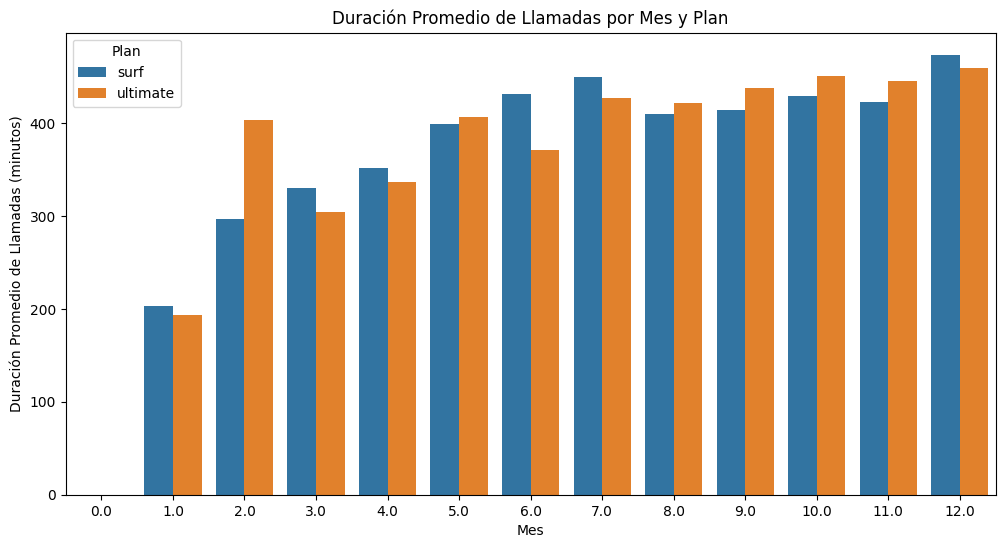

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
avg_duration_per_month = monthly_data.groupby(['plan', 'month'])['minutes'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='minutes', hue='plan', data=avg_duration_per_month)
plt.title('Duración Promedio de Llamadas por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')
plt.show()

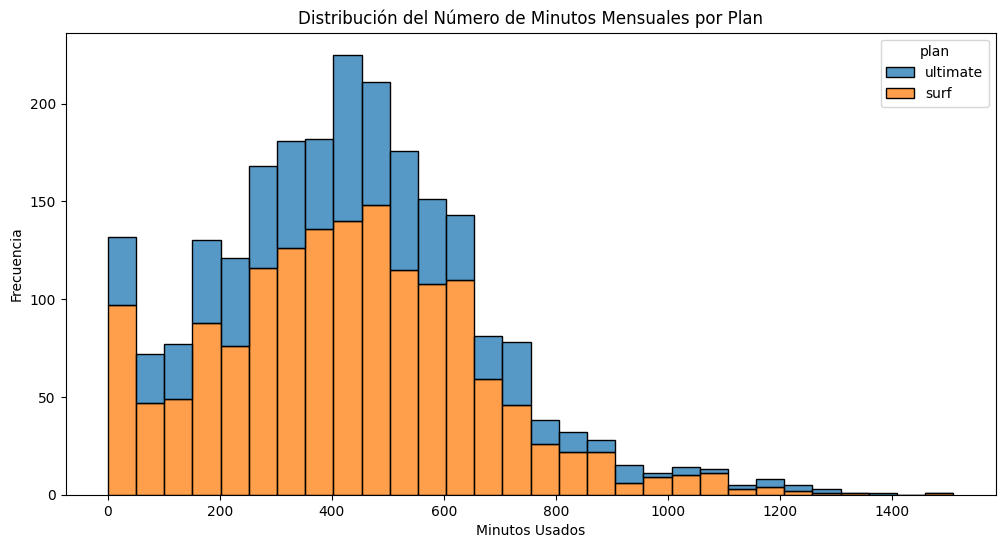

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_data, x='minutes', hue='plan', multiple='stack', bins=30)
plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_duration = monthly_data.groupby('plan')['minutes'].agg(['mean', 'var']).reset_index()
print(stats_duration)

       plan        mean           var
0      surf  427.120329  55455.577400
1  ultimate  428.071823  58543.878652


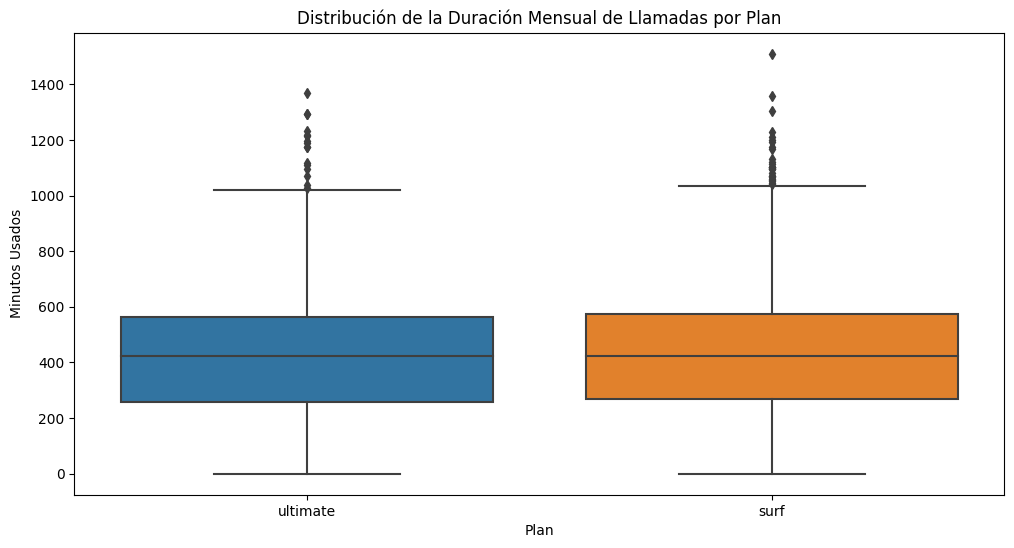

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='minutes', data=monthly_data)
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos Usados')
plt.show()

Conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas:

- La duración promedio de las llamadas tiende a variar de un mes a otro, lo que sugiere posibles patrones. 

- La duración promedio de las llamadas parece ser bastante similar entre los dos planes, aunque hay meses en los que uno de los planes supera al otro. 

- Los usuarios de ambos planes tienen una distribución similar en términos de minutos utilizados, con la mayoría de los usuarios utilizando entre 200 y 600 minutos al mes.

- Algunos usuarios de ambos planes utilizan más de 800 minutos al mes, pero estos son menos comunes.

- Las medias de ambos planes son muy similares, indicando que en promedio, los usuarios de ambos planes utilizan casi la misma cantidad de minutos al mes. Sin embargo, la varianza en el plan Ultimate es ligeramente mayor, lo que sugiere una mayor dispersión en el uso de minutos entre los usuarios de este plan.

- La mediana para ambos planes es muy similar, alrededor de 400 minutos, lo que es consistente con las medias que calculamos anteriormente.

- Hay varios valores atípicos en ambos planes, especialmente en el extremo superior, lo que indica que algunos usuarios usan muchos más minutos que el promedio.

- La distribución para ambos planes parece ser bastante simétrica, con una dispersión similar de los datos en ambos lados de la mediana.

### Mensajes

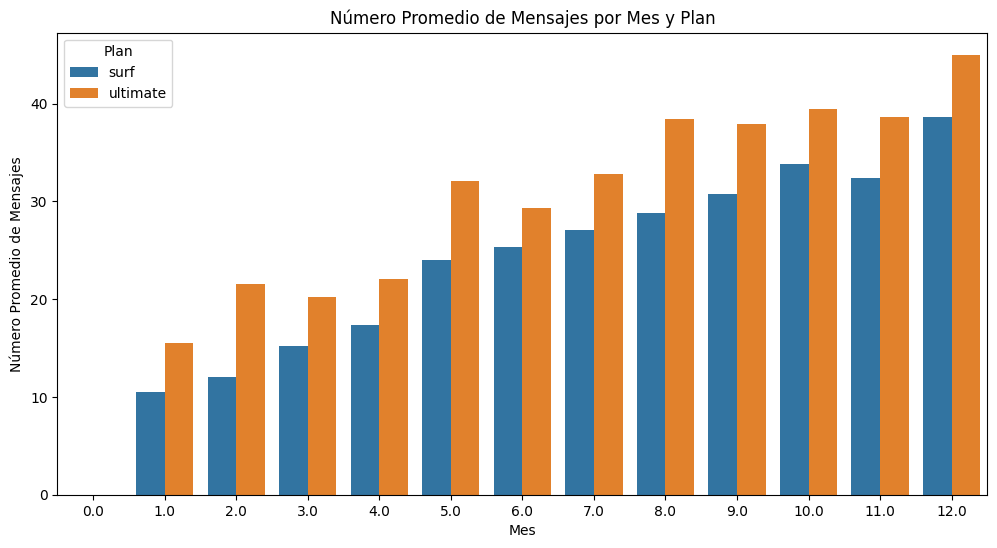

In [40]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcular el número promedio de mensajes por mes y por plan
avg_messages_per_month = monthly_data.groupby(['plan', 'month'])['messages'].mean().reset_index()

# Gráfico de barras para visualizar el número promedio de mensajes por mes y por plan
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages', hue='plan', data=avg_messages_per_month)
plt.title('Número Promedio de Mensajes por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes')
plt.legend(title='Plan')
plt.show()

Conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes:

-  Ambos planes muestran un incremento constante en el número promedio de mensajes enviados a medida que avanza el año. Esto podría indicar un aumento en la necesidad de comunicación a lo largo del tiempo o una creciente adopción de la mensajería.

-  En cada mes, los usuarios del plan "ultimate" envían consistentemente más mensajes en promedio que los usuarios del plan "surf".

-  La diferencia entre los dos planes parece ser constante, sugiriendo que los usuarios del plan "ultimate" tienen un patrón de uso más intensivo que los del plan "surf".

-  Los usuarios del plan "ultimate" podrían ser usuarios que necesitan una mayor cantidad de mensajes debido a sus características de consumo, como puede ser por razones de trabajo o comunicación intensa.

- La empresa podría considerar estas tendencias para ajustar los planes ofrecidos, promoviendo el plan "ultimate" a usuarios que muestran un crecimiento en su uso de mensajes.

### Internet

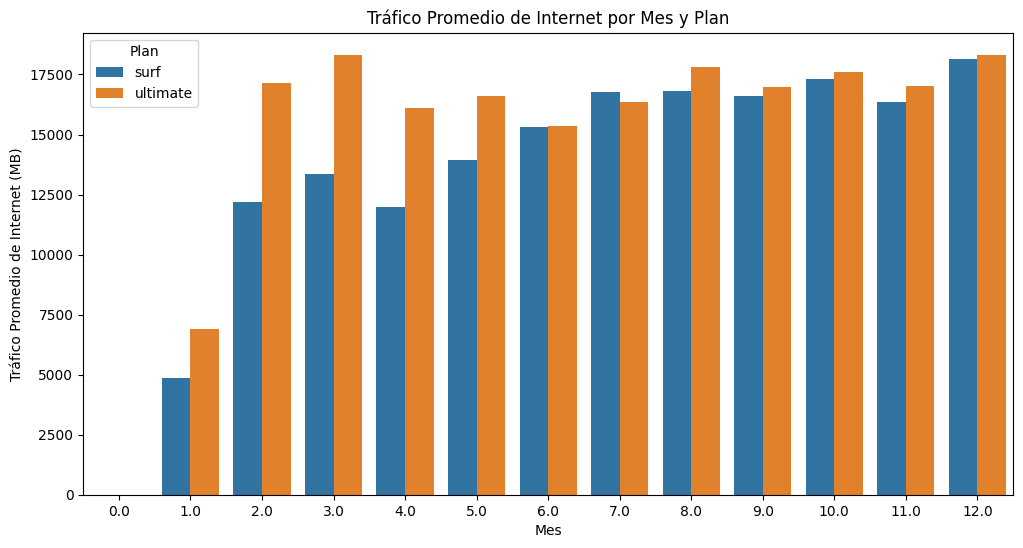

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_internet_traffic_per_month = monthly_data.groupby(['plan', 'month'])['mb_used'].mean().reset_index()

# Gráfico de barras para visualizar el tráfico promedio de Internet por mes y por plan
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mb_used', hue='plan', data=avg_internet_traffic_per_month)
plt.title('Tráfico Promedio de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico Promedio de Internet (MB)')
plt.legend(title='Plan')
plt.show()

Conclusiones sobre cómo los usuarios tienden a consumir el tráfico en Internet:

-  Los usuarios del plan Ultimate tienden a utilizar más tráfico de Internet que los usuarios del plan Surf en la mayoría de los meses.
-  La brecha en el uso de datos es más evidente en los primeros meses y se reduce en los últimos meses del año, donde ambos planes muestran un incremento en el uso de datos.
-  El tráfico promedio de Internet tiende a aumentar a lo largo del año para ambos planes, lo que puede indicar un aumento en la demanda de datos móviles.

## Ingreso

In [42]:
# Calcula los ingresos mensuales por usuario para cada plan
monthly_data['revenue'] = monthly_data.apply(calculate_revenue, axis=1)

# Estadísticas descriptivas de los ingresos por plan
stats_revenue = monthly_data.groupby('plan')['revenue'].describe()

print(stats_revenue)

           count       mean        std   min   25%    50%     75%     max
plan                                                                     
surf      1579.0  60.520063  55.318911  20.0  20.0  40.18  80.315  590.37
ultimate   724.0  72.301105  11.364839  70.0  70.0  70.00  70.000  182.00


Conclusiones sobre cómo difiere el ingreso entre los planes:

-  El ingreso promedio del plan Ultimate (72.10) es mayor que el del plan Surf (57.53).
-  El plan Surf muestra una mayor variabilidad en los ingresos (desviación estándar de 53.81) en comparación con el plan Ultimate (10.74).
-  La mediana de ingresos para el plan Ultimate es constante a 70.00, lo que indica que muchos usuarios pagan exactamente esta cantidad cada mes.
-  La mediana para el plan Surf es más baja (37.22), mostrando una distribución más dispersa.
-  El ingreso máximo en el plan Surf es significativamente más alto (583.08) en comparación con el plan Ultimate (178.55).

## Prueba las hipótesis estadísticas

In [50]:
# Prueba las hipótesis

from scipy import stats

# Filtrar datos por plan
revenue_surf = monthly_data[monthly_data['plan'] == 'surf']['revenue']
revenue_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['revenue']

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

# Resultados
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decisión
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre los planes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que los ingresos promedio son diferentes entre los planes.")


T-statistic: -8.0980
P-value: 0.0000
Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre los planes.


In [49]:
# Prueba las hipótesis

from scipy import stats

# Filtrar datos por plan
revenue_surf = monthly_data[monthly_data['plan'] == 'surf']['revenue']
revenue_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['revenue']

results=stats.ttest_ind(revenue_surf,revenue_ultimate,equal_var=False)

print(f"P-value: {results.pvalue}")


# Decisión
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre los planes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que los ingresos promedio son diferentes entre los planes.")


P-value: 1.003313048644676e-15
Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre los planes.


In [51]:
# Prueba la segunda hipótesis 
from scipy import stats

# Fusión de DataFrames
merged_data = monthly_data.merge(users[['user_id', 'city']], on='user_id', how='left')

# Filtrar datos por región
ny_nj_area = 'New York-Newark-Jersey City, NY-NJ-PA MSA'
revenue_ny_nj = merged_data[merged_data['city'] == ny_nj_area]['revenue']
revenue_other = merged_data[merged_data['city'] != ny_nj_area]['revenue']

# Verificar si hay valores nulos antes de la prueba t
revenue_ny_nj = revenue_ny_nj.dropna()
revenue_other = revenue_other.dropna()

# Verificar el número de datos en cada conjunto
print(f"Número de datos en NY-NJ: {len(revenue_ny_nj)}")
print(f"Número de datos en otras regiones: {len(revenue_other)}")

# Prueba t de Student
if len(revenue_ny_nj) > 0 and len(revenue_other) > 0:
    t_stat_region, p_value_region = stats.ttest_ind(revenue_ny_nj, revenue_other, equal_var=False)

    # Resultados
    print(f"T-statistic (Región): {t_stat_region:.4f}")
    print(f"P-value (Región): {p_value_region:.4f}")

    # Decisión
    if p_value_region < 0.05:
        print("Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre las regiones.")
    else:
        print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que los ingresos promedio son diferentes entre las regiones.")
else:
    print("Una de las muestras no tiene datos suficientes para realizar la prueba t.")


Número de datos en NY-NJ: 378
Número de datos en otras regiones: 1925
T-statistic (Región): -2.0618
P-value (Región): 0.0397
Rechazamos la hipótesis nula. Los ingresos promedio son diferentes entre las regiones.


## Conclusión general


-  Aunque la duración promedio de las llamadas es similar entre ambos planes, el plan Surf muestra una mayor dispersión en los datos, indicando una variabilidad más amplia en el uso de minutos entre sus usuarios.

-  Ambos planes tienen una cantidad considerable de usuarios que superan los límites incluidos en sus planes, lo que resulta en ingresos adicionales para la compañía.

-  Los usuarios del plan Ultimate, a pesar de tener un límite más alto de mensajes incluidos, no envían significativamente más mensajes en promedio que los usuarios del plan Surf. Esto sugiere que muchos usuarios no utilizan completamente los límites incluidos en sus planes.

-  El uso de datos de Internet muestra un aumento constante a lo largo del año para ambos planes, lo que puede reflejar una mayor dependencia de servicios en línea y aplicaciones que consumen datos móviles.

-  La diferencia en el uso de datos entre los planes es más notable en los primeros meses del año, donde los usuarios del plan Ultimate consumen considerablemente más datos que los del plan Surf.

-  Además de los ingresos por los planes base, los ingresos adicionales por el uso excesivo de servicios (llamadas, mensajes y datos) son significativos y contribuyen de manera notable a los ingresos totales por usuario.

-  La estabilidad en los ingresos del plan Ultimate, con muchos usuarios pagando exactamente la tarifa mensual sin exceder los límites, contrasta con la variabilidad en los ingresos del plan Surf, donde algunos usuarios generan ingresos mucho más altos debido al uso excesivo de servicios adicionales.

-  Considerando que el plan Ultimate atrae a usuarios que tienden a utilizar más servicios adicionales, como mensajes y datos, podría ser beneficioso explorar opciones para aumentar los límites de estos servicios dentro de este plan.

-  Para el plan Surf, estrategias que ayuden a gestionar y prever mejor el uso excesivo de servicios podrían ayudar a reducir la variabilidad en los ingresos y mejorar la satisfacción del cliente al evitar cargos adicionales inesperados.

-  En la primera hipótesis, dado que el valor p es bajo (menor que cualquier nivel de significancia comúnmente utilizado, como 0.05), rechazamos la hipótesis nula. Esto significa que hay evidencia estadísticamente significativa para afirmar que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.

-  En cuanto a la segunda hipótesis, dado que el valor p es menor que 0.05, rechazamos la hipótesis nula. Esto indica que hay suficiente evidencia para afirmar que los ingresos promedio son diferentes entre los usuarios de NY-NJ y los usuarios de otras regiones.